# Image Sentiment Classifier

### Installing the dependencies and setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib 

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Dell\AppData\Local\Temp\pip-install-4q3kmzdg\tensorflow-gpu_27a3f71038244a93a5d43a10380b3ecd\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-ex

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
autopep8                     2.0.1
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
colorama                     0.4.5
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    1.0.0
fastjsonschema               2.16.1
flatbuffers                  23.3.3
fonttools                    4.39.3
g


[notice] A new release of pip available: 22.2.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os
# os is bascially used to get the OS module in Python which provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc.

In [4]:
# Avoiding Out of memory (OOM) erros by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Remove Dodgy Images

In [5]:
import cv2 # it basically is a part of opencv which helps in image preprocessing
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data'
# as told it creates a path to that directory

In [7]:
os.listdir(data_dir) 
# list of directories in data_dir

['happy', 'sad']

In [8]:
os.listdir(os.path.join(data_dir,'sad'))
# list of files in sad folder of data_dir

['107188144-1675355909384-gettyimages-1302154722-dsc_9175.jpeg',
 '1694806.jpg',
 '171220-music.jpg',
 '214-2142366_transparent-depression-png-depressed-sad-person-png-png.png',
 '2652760.jpg',
 '280-2804580_sad-people-png-sad-person-png-transparent-png.png',
 '314071_2200-732x549.jpg',
 '360_F_561995097_a0dHcJrC2lCdOj6CBp6xBeGYv0hCsMyM.jpg',
 '360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '42-15542443.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-320-80.jpg',
 '8iAb9k4aT.jpg',
 'aid12707023-v4-1200px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'all-those-people-who-are-sad-17573-1.jpg',
 'boy-with-head-down.jpg',
 'crying-at-work.jpg',
 'crying-on-steps-e1505252236719-300x200.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'depression-1020x680.jpg',
 'Depression-Quotes-from-Books-1-1.jpg',
 'Depression-Vs-Sadness-Are-You-Just-Sad-Or-Depr

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
# image extensions

In [10]:
img = cv2.imread(os.path.join(data_dir,'happy','clownface.jpg'))
img
# opencv has converted it into numpyarr

array([[[186, 151, 108],
        [186, 150, 110],
        [187, 148, 109],
        ...,
        [132, 107,  57],
        [133, 107,  60],
        [134, 108,  61]],

       [[186, 151, 108],
        [186, 150, 110],
        [188, 149, 110],
        ...,
        [132, 108,  56],
        [134, 108,  61],
        [133, 108,  58]],

       [[185, 150, 107],
        [185, 150, 107],
        [188, 150, 108],
        ...,
        [132, 107,  57],
        [135, 109,  62],
        [133, 108,  58]],

       ...,

       [[120,  91,  46],
        [121,  92,  47],
        [120,  91,  46],
        ...,
        [141, 116,  66],
        [140, 115,  65],
        [142, 115,  65]],

       [[122,  92,  45],
        [121,  91,  44],
        [120,  92,  45],
        ...,
        [141, 115,  68],
        [141, 116,  66],
        [142, 115,  65]],

       [[121,  91,  44],
        [120,  90,  41],
        [121,  91,  42],
        ...,
        [142, 116,  69],
        [141, 115,  68],
        [143, 116,  66]]

In [11]:
type(img)

numpy.ndarray

In [12]:
img.shape
# 2500 rows, 1762 cols, 3 channels(means coloured) 

(760, 1140, 3)

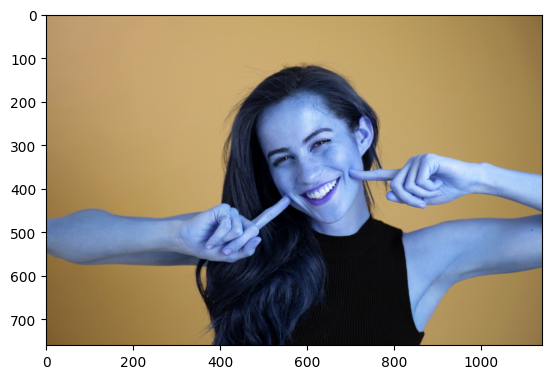

In [13]:
plt.imshow(img)
plt.show()
# as we can see the colors are not upto the mark so we have to convert BGR to RGB 

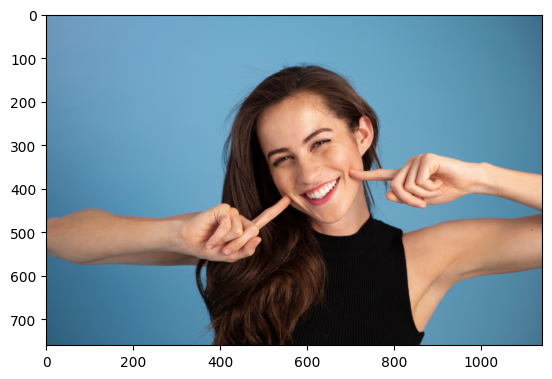

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# here we are mapping the images in the happy sad directories to opencv if its ext in present in image_ext
for image_class in os.listdir(data_dir):
    for image in  os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img1 = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            # imghdr.what tells the type of image i.e. jpg,gif,png etc.
            if tip not in image_exts:
                print("Image not in ext list {}". format(image_path)) # .format replaces the particulart part of a string with it 
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'. format(image_path))

### Load Data

In [41]:
tf.data.Dataset?? #?? gives u documentation

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [22]:
import numpy as np

In [23]:
tf.keras.utils.image_dataset_from_directory??
# helps in creating a pipeline for our data on the go so we dont need to create them separately 

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [24]:
# here data doesnt store the data it just generates that on the go from the data directory
data = tf.keras.utils.image_dataset_from_directory('data')
data

Found 140 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# accessing the data
data_iterator = data.as_numpy_iterator()
data_iterator

In [26]:
# batch gets the data according to batch size as in keras.utils along with the label which is happy/sad here
batch = data_iterator.next()

In [27]:
len(batch)
# contains the numpy of image along with label

2

In [28]:
batch[0] #contains the image np arrays

array([[[[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ]],

        [[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ]],

        [[  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ],
         ...,
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ],
         [  6.        ,   6.        ,   6.        ]],

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1] #contains the labels

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

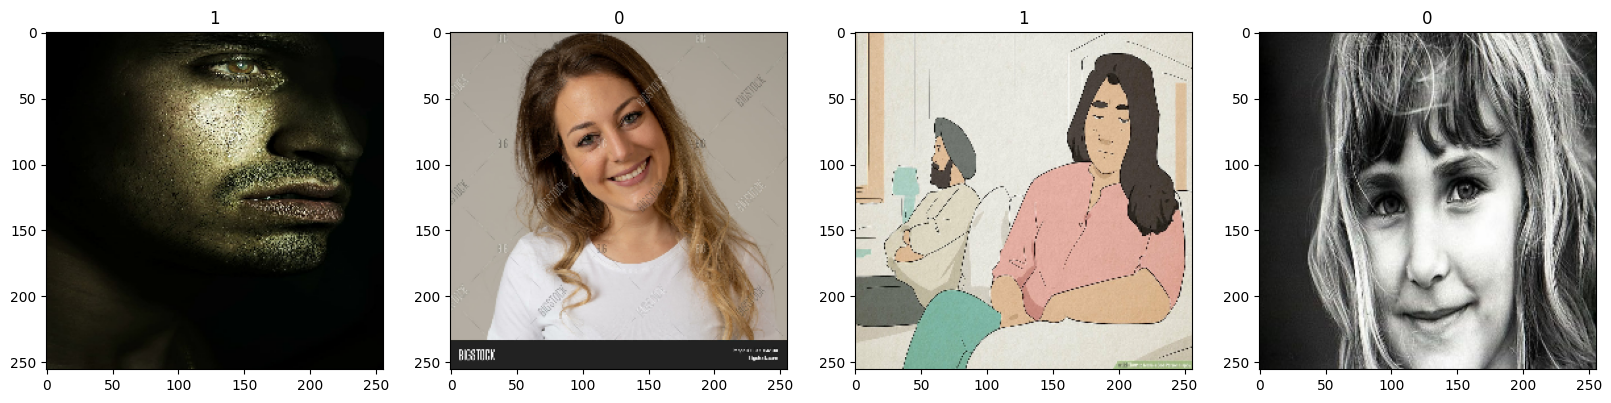

In [31]:
# showing the batch images
fig, ax = plt.subplots(ncols=4, figsize = (20,20)) #subplots plots 4 images at a particular time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# here we have basically took first 4 images to check whether which label belongs to which class

1 - SAD
0 - HAPPY

## Preprocessing the data

### Scaling
In scaling we basically reduces our image size from 0-255 to 0-1 to make DL process fast

In [32]:
batch[0].min()

0.0

In [33]:
batch[0].max()

255.0

Now as we know that batch doesnt store the images so we will create a map that reduces the size of image as we access them

In [34]:
data = data.map(lambda x, y: (x/255, y))
# x -> image
# y -> label

In [35]:
scaled_iterator = data.as_numpy_iterator()

In [36]:
batch = scaled_iterator.next()

In [37]:
batch[0].min()

0.0

In [38]:
batch[0].max()

1.0

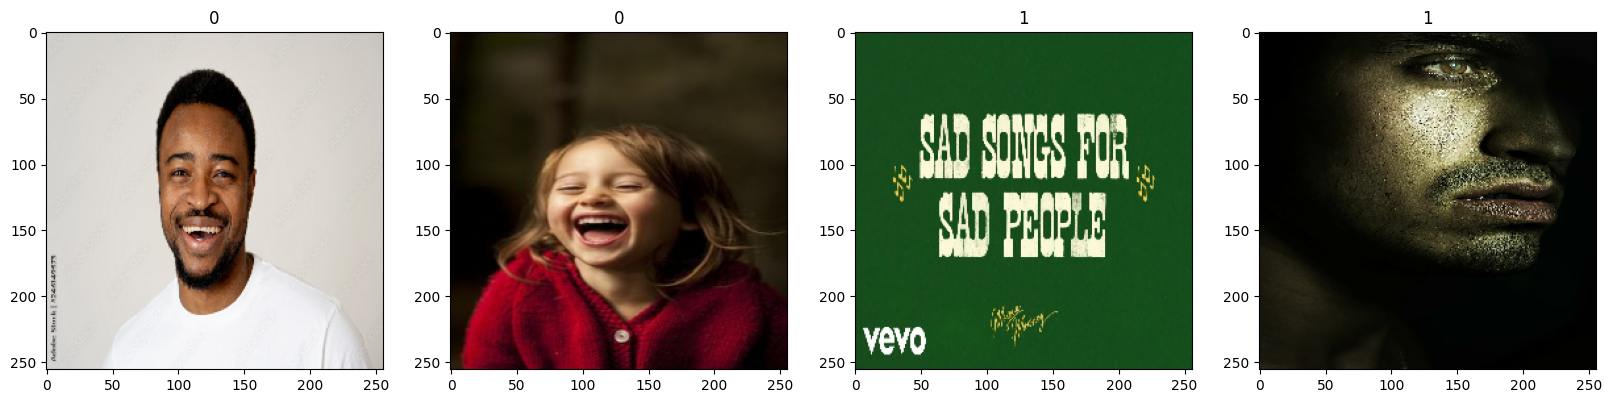

In [39]:
# showing the batch images
fig, ax = plt.subplots(ncols=4, figsize = (20,20)) #subplots plots 4 images at a particular time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# here we have basically took first 4 images to check whether which label belongs to which class

### Split Data

In [42]:
len(data)

5

In [44]:
#defining the train size here the data to take for training our model
train_size = int(len(data)*.7)
train_size

3

In [45]:
#defining the validating size here the data to take for evaluating our model
val_size = int(len(data)*.2)
val_size

1

In [47]:
#defining the test size here the data to take for testing our model
test_size = int(len(data)*.1)+1
test_size

1

test_size + val_size + train_size = len_data(5 in this case)

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
# these attributes are provided by tf itself to take and skip the data 

### Building the Model

Basically we have to implement model for which we have to import some libs

In [50]:
from tensorflow.keras.models import Sequential
# Sequential is the model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# Conv2d is the convolutional layers imported
# MaxPooling2d is the pooling layer which reduces the size of images 
# Dense is basically the last layer where all the neurons connect
# Flatten just flattens the image to a 1-D nparray 

In [51]:
model = Sequential()

In [52]:
# 16 represents the num of neurons 1 is the stride for the layer and (3,3) is the image size
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# in dense 1 refers to the single neuron output showing 1 & 0

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training Model

log dir helps us to keep a track of our model at its each step and and logdir at tensorflow helps us to keep a data visualization record especially of the metrics and losses

In [57]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 0.9874 - accuracy: 0.4896 - val_loss: 0.7229 - val_accuracy: 0.4375
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.6603 - accuracy: 0.6667 - val_loss: 0.6069 - val_accuracy: 0.6562
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.6045 - accuracy: 0.6354 - val_loss: 0.5443 - val_accuracy: 0.8125
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.5120 - accuracy: 0.8229 - val_loss: 0.4533 - val_accuracy: 0.8438
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 0.5024 - accuracy: 0.7604 - val_loss: 0.4696 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.3820 - accuracy: 0.8542 - val_loss: 0.2811 - val_accuracy: 0.9375
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.3985 - accuracy: 0.8125 - val_loss: 0.3699 - val_accuracy: 0.8750
Epoch 8/20
3/3 [=========================

with growing epochs loss & val_losses should decrease
and accuracy & val_accuracy should increase

In [61]:
# callbacks stores in this way
hist.history

{'loss': [0.9873642921447754,
  0.6602780818939209,
  0.6045340895652771,
  0.5119981169700623,
  0.5023714900016785,
  0.38203275203704834,
  0.398489385843277,
  0.3747076094150543,
  0.34878721833229065,
  0.26708415150642395,
  0.24022233486175537,
  0.17563633620738983,
  0.19510166347026825,
  0.18522261083126068,
  0.14698931574821472,
  0.10035886615514755,
  0.08413252979516983,
  0.053556423634290695,
  0.07501745969057083,
  0.052022796124219894],
 'accuracy': [0.4895833432674408,
  0.6666666865348816,
  0.6354166865348816,
  0.8229166865348816,
  0.7604166865348816,
  0.8541666865348816,
  0.8125,
  0.8125,
  0.84375,
  0.90625,
  0.9270833134651184,
  0.9583333134651184,
  0.9375,
  0.9583333134651184,
  0.9479166865348816,
  0.9895833134651184,
  0.9791666865348816,
  1.0,
  0.9791666865348816,
  0.9895833134651184],
 'val_loss': [0.722942590713501,
  0.6068620681762695,
  0.544255256652832,
  0.45327889919281006,
  0.4696219861507416,
  0.2811068296432495,
  0.3698872625

### Plot Performance using callbacks

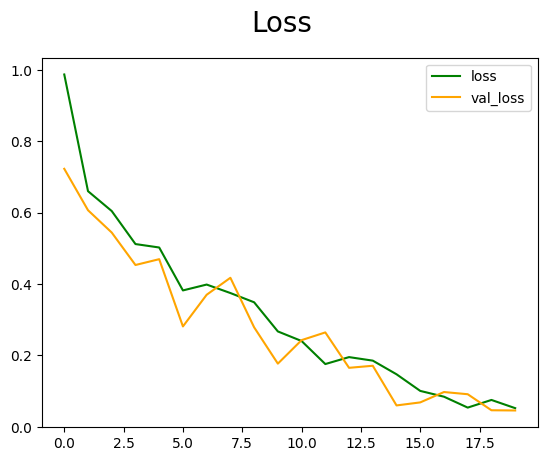

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'green', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper right") # legends represents the box on upper right
plt.show()

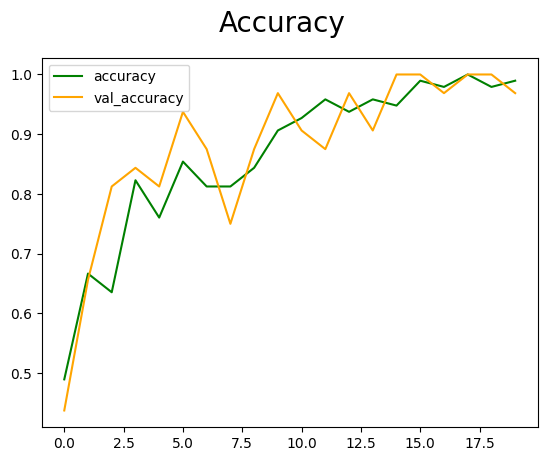

In [68]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'green', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

### Evaluate Performance

In [69]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [70]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [71]:
len(test)

1

In [73]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 219ms/step


In [74]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### Test

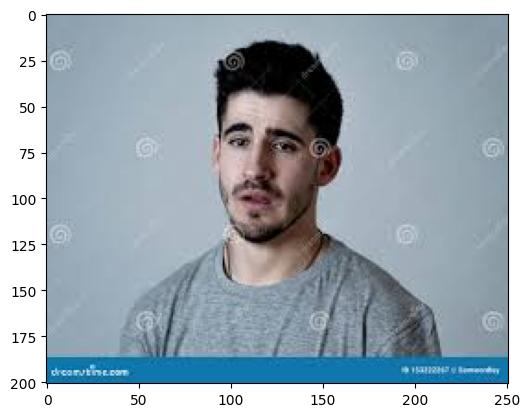

In [93]:
img = cv2.imread("hsadtest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

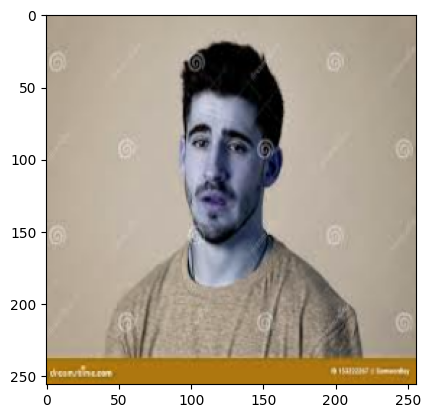

In [94]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [95]:
resize.shape

TensorShape([256, 256, 3])

In [96]:
# here we have to expand our image extensions coz our model is expecting a batch of images
np.expand_dims(resize, 0)

array([[[[172.       , 158.       , 139.       ],
         [172.       , 158.       , 139.       ],
         [172.95117  , 158.95117  , 139.95117  ],
         ...,
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ]],

        [[172.       , 158.       , 139.       ],
         [172.       , 158.       , 139.       ],
         [172.95117  , 158.95117  , 139.95117  ],
         ...,
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ]],

        [[172.       , 158.       , 139.       ],
         [172.       , 158.       , 139.       ],
         [172.95117  , 158.95117  , 139.95117  ],
         ...,
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ],
         [166.       , 152.       , 134.       ]],

        ...,

        [[174.13086  , 121.22266  ,   

In [97]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [98]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 79ms/step


array([[0.9140402]], dtype=float32)

In [99]:
if yhat > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


### Saving the Model

Here we have saved our model in models folder to access it using that folder for future

In [100]:
from tensorflow.keras.models import load_model

.h5 basically seralizes the model to store it effeciently

In [101]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [102]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [105]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))
yhat_new

1/1 [==============================] - 0s 52ms/step


array([[0.9140402]], dtype=float32)

In [106]:
if yhat_new > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad
